In [1]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from keras import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.optimizers import Adam

In [4]:
import numpy as np
import pandas as pd
import os
import cv2

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [12]:
train_image = mpimg.imread('train/NORMAL/NORMAL-2552119-0002.jpeg')

In [17]:
train_image.shape

(1446, 1654)

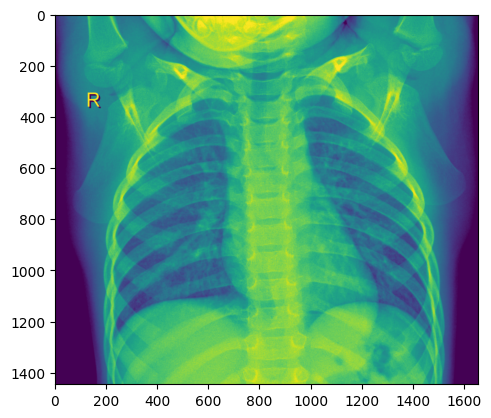

In [16]:
plt.imshow(train_image)

In [44]:
X = []
y = []

for i in os.listdir(f'train/'):
    for j in os.listdir(f'train/{i}'):
        try:
            image = mpimg.imread(f'train/{i}/{j}')
        except:
            continue
        if len(image.shape) == 3:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = cv2.resize(image, (128, 128))
        image = image.reshape(128, 128, 1)
        image = image / 255
        X.append(image)
        y.append(i)

X = np.array(X)
y = np.array(y)

In [45]:
label = LabelEncoder()
y = label.fit_transform(y)

In [46]:
label.classes_

array(['NORMAL', 'PNEUMONIA'], dtype='<U9')

In [63]:
labels = ['Normal', 'Pneumonia']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [49]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(units=32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [50]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.7601 - loss: 0.4637 - val_accuracy: 0.9516 - val_loss: 0.2124
Epoch 2/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9220 - loss: 0.2567 - val_accuracy: 0.9580 - val_loss: 0.1421
Epoch 3/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9402 - loss: 0.1827 - val_accuracy: 0.9618 - val_loss: 0.1225
Epoch 4/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 68ms/step - accuracy: 0.9483 - loss: 0.1617 - val_accuracy: 0.9618 - val_loss: 0.1295
Epoch 5/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 70ms/step - accuracy: 0.9548 - loss: 0.1404 - val_accuracy: 0.9656 - val_loss: 0.0895
Epoch 6/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9627 - loss: 0.1165 - val_accuracy: 0.9694 - val_loss: 0.0802
Epoch 7/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9654 - loss: 0.1018 - val_accuracy: 0.9656 - val_loss: 0.0858
Epoch 8/10
139/139 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.9710 - loss: 0.0882 - 

In [58]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     7,372,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,207,877 (84.72 MB)

 Trainable params: 7,402,625 (28.24 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,805,252 (56.48 MB)

In [52]:
test_img = mpimg.imread('Pneumonia_chest.webp')

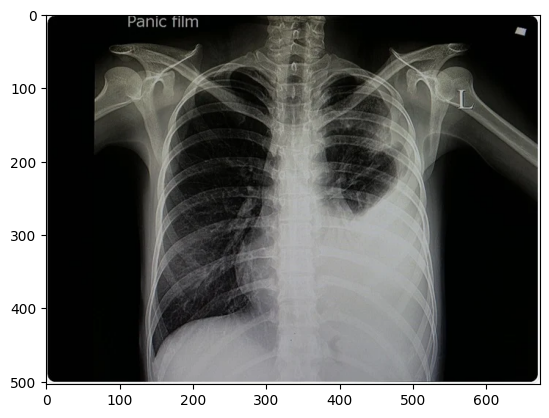

In [53]:
plt.imshow(test_img)

In [54]:
test_img.shape

(504, 673, 3)

In [55]:
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)

In [59]:
test_img = cv2.resize(test_img, (128, 128))

In [60]:
test_img = test_img.reshape(1, 128, 128, 1)

In [70]:
pred = labels[int(np.max(model.predict(test_img)))]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


In [71]:
pred

'Pneumonia'